In [1]:
%matplotlib inline

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../') # refractive is not in my default path. Change it according to your

from refractive import water
from refractive import ice

In [2]:
Temperature = np.array(266.0)
Frequencies = np.linspace(1,250,1000)

n_wat = water.n(Temperature, Frequencies)
n_ice =   ice.n(Temperature, Frequencies)
ni_wb = ice.n(Temperature,Frequencies,model='Warren_2008')
ni_iy = ice.n(Temperature,Frequencies,model='Iwabuchi_2011')
ni_iy.shape

(1000,)

Now plot the results. 

Text(0.5,1,'Refractive index')

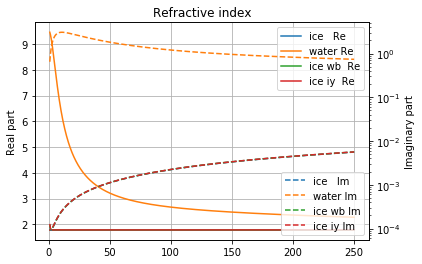

In [3]:
f, ax = plt.subplots()
ax.plot(Frequencies, n_ice.real,label='ice   Re')
ax.plot(Frequencies, n_wat.real,label='water Re')
ax.plot(Frequencies, ni_wb.real,label='ice wb  Re')
ax.plot(Frequencies, ni_iy.real,label='ice iy  Re')
ax.legend()
ax.grid()
ax.set_ylabel('Real part')
axt = ax.twinx()
axt.plot(Frequencies, n_ice.imag,'--',label='ice   Im')
axt.plot(Frequencies, n_wat.imag,'--',label='water Im')
axt.plot(Frequencies, ni_wb.imag,'--',label='ice wb Im')
axt.plot(Frequencies, ni_iy.imag,'--',label='ice iy Im')
axt.set_yscale('log')
axt.legend()
axt.set_ylabel('Imaginary part')
ax.set_title('Refractive index')

Highlight the differences between Matzler and Warren 2008 model

Text(0.5,1,'Refractive index')

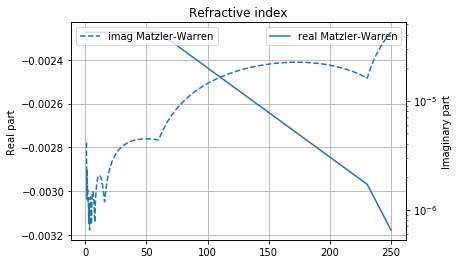

In [4]:
f, ax = plt.subplots()
ax.plot(Frequencies, n_ice.real-ni_wb.real,label='real Matzler-Warren')
ax.legend()
ax.grid()
ax.set_ylabel('Real part')
axt = ax.twinx()
axt.plot(Frequencies, abs(n_ice.imag-ni_wb.imag),'--',label='imag Matzler-Warren')
axt.set_yscale('log')
axt.legend()
axt.set_ylabel('Imaginary part')
ax.set_title('Refractive index')

And Iwabuchi vs Warren at 266 K 

(1000,) (1000,)


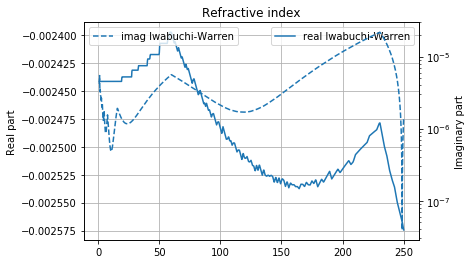

In [5]:
f, ax = plt.subplots()
ax.plot(Frequencies, ni_iy.real-ni_wb.real,label='real Iwabuchi-Warren')
ax.legend()
ax.grid()
ax.set_ylabel('Real part')
axt = ax.twinx()
axt.plot(Frequencies, abs(ni_iy.imag-ni_wb.imag),'--',label='imag Iwabuchi-Warren')
axt.set_yscale('log')
axt.legend()
axt.set_ylabel('Imaginary part')
ax.set_title('Refractive index')
print(ni_iy.shape,ni_wb.shape)

In [ ]:
Temps = np.linspace(240,270,3)
Freqs = np.linspace(1,250,3)

Tv, Fv = np.meshgrid(Temps, Freqs, sparse=False)

ni_ma = ice.n(Tv,Fv)
ni_iy = ice.n(Tv,Fv,model='Iwabuchi_2011')
print(ni_ma.shape,ni_iy.shape)
print(len(ni_ma.shape),len(ni_iy.shape))
print(ni_ma)
print(ni_iy)

In [7]:
ni_iy

array([[ 1.77701000 +2.18657774e-05j,  1.77701000 +2.18657774e-05j,
         1.77701000 +2.18657774e-05j],
       [ 1.78113041 +2.30407094e-03j,  1.78113041 +2.30407094e-03j,
         1.78113041 +2.30407094e-03j],
       [ 1.78537460 +6.05760737e-03j,  1.78537460 +6.05760737e-03j,
         1.78537460 +6.05760737e-03j]])